In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
pts = np.random.random((7,2))
pts

array([[0.83176723, 0.6914177 ],
       [0.20334522, 0.62795345],
       [0.70594682, 0.67809409],
       [0.00947068, 0.29146622],
       [0.63598663, 0.23523457],
       [0.00145186, 0.50132663],
       [0.48623689, 0.16467526]])

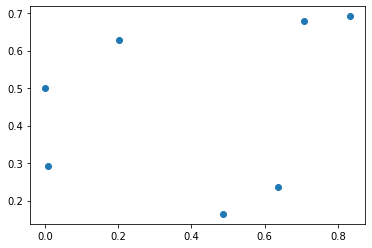

In [11]:
X, Y = pts.T
plt.scatter(X,Y)

In [19]:
def euc_dist(p1, p2):
    return np.sqrt( (p2[0]-p1[0])**2 + (p2[1]-p1[1])**2 )

In [20]:
p1 = pts[0]
p2 = pts[1]

euc_dist(p1, p2)

0.8317672283982325
[0.20334522 0.62795345]


0.6316185031572485